# TP 2 - Reconstrucción 3D

In [1]:
import pickle as pkl
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os 
import sys

In [2]:
image_path_left = 'data/captures/left_3.jpg'
image_path_right = 'data/captures/left_3.jpg'
#read images as rgb

imgL = cv.imread(image_path_left)
imgR = cv.imread(image_path_right)

In [3]:
#open pickel file
with open('data/stereo_maps.pkl', 'rb') as f:
    mat_dict = pkl.load(f)

In [4]:
print(mat_dict['Q'])

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 -9.70262848e+02]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -5.39484238e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  6.00600906e+02]
 [ 0.00000000e+00  0.00000000e+00  1.66848275e-02 -0.00000000e+00]]


In [25]:
def show_rectified_images(left_image, right_image, stereo_maps, save_path=None, n_image=0, plot_images=True):
    # Extract rectification maps
    left_map_x = stereo_maps["left_map_x"]
    left_map_y = stereo_maps["left_map_y"]
    right_map_x = stereo_maps["right_map_x"]
    right_map_y = stereo_maps["right_map_y"]

    # Rectify the images
    left_rectified = cv.remap(left_image, left_map_x, left_map_y, cv.INTER_LINEAR)
    right_rectified = cv.remap(right_image, right_map_x, right_map_y, cv.INTER_LINEAR)

    # Stack original and rectified images horizontally
    original_images = np.hstack((left_image, right_image))
    rectified_images = np.hstack((left_rectified, right_rectified))

    if plot_images:
        # Plot images using matplotlib
        fig, axes = plt.subplots(2, 1, figsize=(15, 10))

        # Plot original images with epipolar lines
        axes[0].imshow(cv.cvtColor(original_images, cv.COLOR_BGR2RGB))
        axes[0].set_title("Original Images with Epipolar Lines")
        for y in np.linspace(0, original_images.shape[0], 4, endpoint=False):
            axes[0].axhline(y, color='r', linestyle='--', linewidth=0.5)

        # Plot rectified images with epipolar lines
        axes[1].imshow(cv.cvtColor(rectified_images, cv.COLOR_BGR2RGB))
        axes[1].set_title("Rectified Images with Epipolar Lines")
        for y in np.linspace(0, rectified_images.shape[0], 4, endpoint=False):
            axes[1].axhline(y, color='r', linestyle='--', linewidth=0.5)

        plt.show()

    if save_path:
        # Save rectified images
        # Create directory if it does not exist
        if not os.path.exists(save_path):
            os.makedirs(save_path)
        left_rectified_path = f"{save_path}/{n_image}_left.png"
        right_rectified_path = f"{save_path}/{n_image}_right.png"
        cv.imwrite(left_rectified_path, left_rectified)
        cv.imwrite(right_rectified_path, right_rectified)
        print(f"Rectified images saved to {save_path}")  

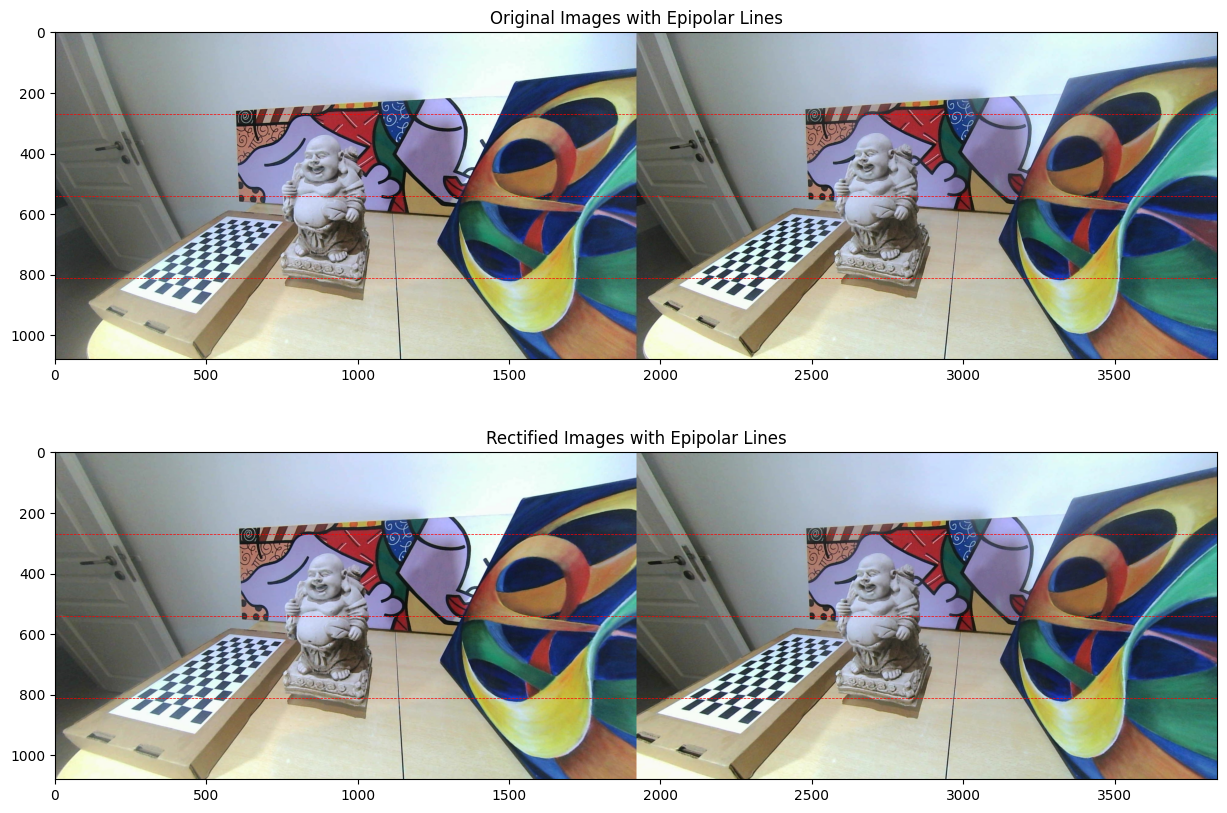

In [26]:
show_rectified_images(imgL, imgR, mat_dict, plot_images=True)



In [29]:
# Bucle para guardar todas las imágenes rectificadas
for i in range(0, 6):
    image_path_left = f'data/captures/left_{i}.jpg'
    image_path_right = f'data/captures/right_{i}.jpg'
    # Leer imágenes como RGB
    imgL = cv.imread(image_path_left, 0)
    imgR = cv.imread(image_path_right, 0)
    show_rectified_images(imgL, imgR, mat_dict, save_path='data/rectified_images', n_image=i, plot_images=False)
    print(f"Rectified images {i} saved")
print("All images saved")
    

Rectified images saved to data/rectified_images
Rectified images 0 saved
Rectified images saved to data/rectified_images
Rectified images 1 saved
Rectified images saved to data/rectified_images
Rectified images 2 saved
Rectified images saved to data/rectified_images
Rectified images 3 saved
Rectified images saved to data/rectified_images
Rectified images 4 saved
Rectified images saved to data/rectified_images
Rectified images 5 saved
All images saved


In [ ]:
#utilizamos stereodemo para ver las imagenes rectificadas
